#**Parameter Analysis for the ARIMA model**

## Import the library


In [1]:
!pip install pmdarima
from pmdarima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:00


## Read dataset

In [2]:
df=pd.read_csv('/content/traffic (4).csv')

In [3]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
df_part = df.iloc[:100]
df_part.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Fit auto_arima function to AirPassengers dataset


In [5]:
stepwise_fit = auto_arima(df['Vehicles'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 2,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True,
                          information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,1,1)[2] intercept   : BIC=inf, Time=39.57 sec
 ARIMA(0,0,0)(0,1,0)[2] intercept   : BIC=328880.456, Time=1.40 sec
 ARIMA(1,0,0)(1,1,0)[2] intercept   : BIC=303968.017, Time=15.99 sec
 ARIMA(0,0,1)(0,1,1)[2] intercept   : BIC=inf, Time=31.06 sec
 ARIMA(0,0,0)(0,1,0)[2]             : BIC=328869.675, Time=1.08 sec
 ARIMA(1,0,0)(0,1,0)[2] intercept   : BIC=311654.905, Time=2.15 sec
 ARIMA(1,0,0)(2,1,0)[2] intercept   : BIC=302849.117, Time=20.05 sec
 ARIMA(1,0,0)(2,1,1)[2] intercept   : BIC=inf, Time=127.93 sec
 ARIMA(1,0,0)(1,1,1)[2] intercept   : BIC=inf, Time=78.29 sec
 ARIMA(0,0,0)(2,1,0)[2] intercept   : BIC=328446.283, Time=9.37 sec
 ARIMA(1,0,1)(2,1,0)[2] intercept   : BIC=inf, Time=50.27 sec
 ARIMA(0,0,1)(2,1,0)[2] intercept   : BIC=inf, Time=44.37 sec
 ARIMA(1,0,0)(2,1,0)[2]             : BIC=302838.336, Time=9.24 sec
 ARIMA(1,0,0)(1,1,0)[2]             : BIC=303957.235, Time=7.42 sec
 ARIMA(1,0,0)(2,1,1)[2]             : 

## To print the summary


In [11]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                48120
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 2)   Log Likelihood             -151397.605
Date:                           Wed, 21 Aug 2024   AIC                         302803.210
Time:                                   16:59:34   BIC                         302838.336
Sample:                                        0   HQIC                        302814.233
                                         - 48120                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7685      0.002    503.157      0.000       0.766       0.772
ar.S.L2       -0.5203      0.002   -277.031      0.000      -0.524      -0.517
ar.S.L4       -0.1620      0.002    -67.352      0.000      -0.167      -0.157
sigma2        31.6540      0.053    592.968      0.000      31.549      31.759
===================================================================================
Ljung-Box (L1) (Q):                1024.82   Jarque-Bera (JB):           2100584.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [6]:
train_data, test_data = df[0:-12], df[-12:]

## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [8]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data['Vehicles'], order=(0, 1, 1), seasonal_order=(2, 1, 1, 12))
results = model.fit()



In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                48108
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood             -140812.138
Date:                            Wed, 21 Aug 2024   AIC                         281634.277
Time:                                    17:37:59   BIC                         281678.181
Sample:                                         0   HQIC                        281648.055
                                          - 48108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1622      0.001   -124.158      0.000      -0.165      -0.160
ar.S.L12      -0.1870      0.003    -65.329      0.000      -0.193      -0.181
ar.S.L24       0.2432      0.002    118.167      0.000       0.239       0.247
ma.S.L12      -0.9815      0.001  -1133.662      0.000      -0.983      -0.980
sigma2        20.4273      0.025    830.140      0.000      20.379      20.476
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):           6682102.17
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        60.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [11]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

## plot predictions and actual values



<Axes: >

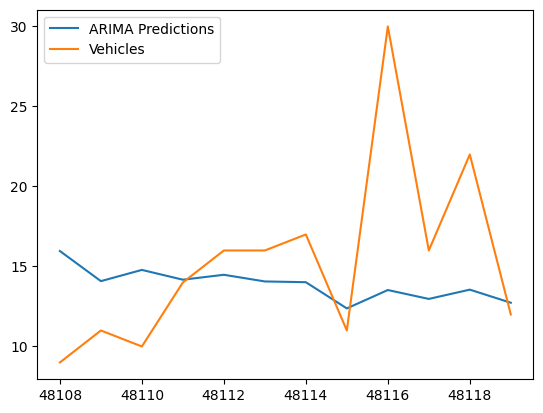

In [12]:
predictions.plot(legend=True)
test_data['Vehicles'].plot(legend=True)

## Evaluate the model using MSE and RMSE

In [13]:
rmse(test_data['Junction'], predictions)
mean_squared_error(test_data['Junction'], predictions)

98.76860005765464

#**Well Done :)**